# Box-Cox

Lambda value used for Transformation: 0.26628876431402354


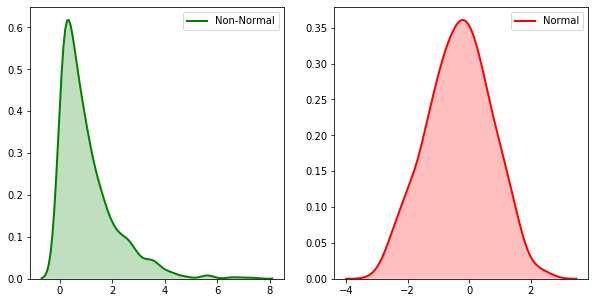

In [13]:
# import modules
import numpy as np
import pandas as pd
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data (exponential)
n = 1000
original_data = np.random.exponential(size = n)
data = {
    'ID': list(range(n)), 
    'OriData': list(original_data)
}
df = pd.DataFrame(data=data)

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
df['Fitted_Data'] = fitted_data

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")


In [33]:
mean = df.Fitted_Data.mean()
std = df.Fitted_Data.std()
lower, upper = mean - 2*std, mean + 2*std
df['abnomaly'] = df['Fitted_Data'].apply(lambda x: 0 if (lower < x and x < upper) else 1)
df[df['abnomaly'] == 1].ID.tolist()

[33,
 54,
 84,
 138,
 177,
 179,
 302,
 323,
 330,
 343,
 369,
 409,
 428,
 431,
 445,
 453,
 459,
 467,
 501,
 545,
 579,
 582,
 639,
 668,
 680,
 684,
 708,
 715,
 790,
 794,
 806,
 818,
 826,
 834,
 870,
 906,
 914,
 936]

# Box Plot

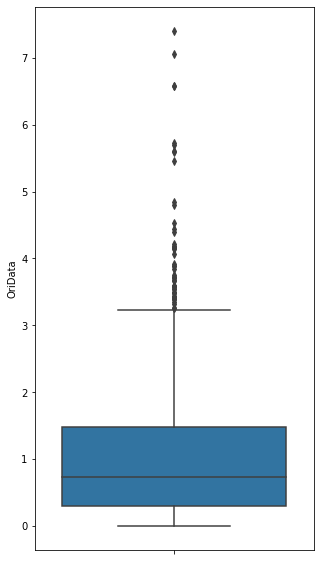

In [50]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(y=df.OriData)
fig.set_figheight(10)
fig.set_figwidth(5)

# Time Series Detection

## Method 1: Moving Average

In [41]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('./Electric_Production.csv')
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
df.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [42]:
df['Moving_avg'] = df.Value.rolling(window=7).mean()
df = df[df['Moving_avg'].notna()]

In [43]:
df['anomaly'] = df.apply(
    lambda x: (abs(x['Value'] - x['Moving_avg']) / x['Moving_avg']) > 0.1 , # this is the threshhold to be set as anomaly
    axis = 1
)

In [44]:
df[df.anomaly]

,DATE,Value,Moving_avg,anomaly
11,1985-12-01,68.7145,61.082014,True
12,1986-01-01,73.3057,63.255629,True
16,1986-05-01,55.8137,63.296614,True
24,1987-01-01,73.8152,64.296014,True
36,1988-01-01,79.8703,68.048943,True
...,...,...,...,...
379,2016-08-01,115.5159,102.311286,True
387,2017-04-01,88.3530,100.125614,True
390,2017-07-01,112.1538,101.445814,True
395,2017-12-01,114.7212,103.932057,True


## Method 2: STL

In [45]:
df.set_index('DATE', inplace=True)
data1 = df[['Value']]

In [47]:
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition

# result_mul = seasonal_decompose(data1, model='multiplicative', extrapolate_trend='freq', freq=1)

# Actual_Values = result_mul.seasonal * result_mul.trend * result_mul.resid
# Additive Decomposition

result_add = seasonal_decompose(data1, model='additive', freq=14)

Actual_Values = result_add.seasonal + result_add.trend + result_add.resid

<ipython-input-47-d8e1769631fb>:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(data1, model='additive', freq=14)


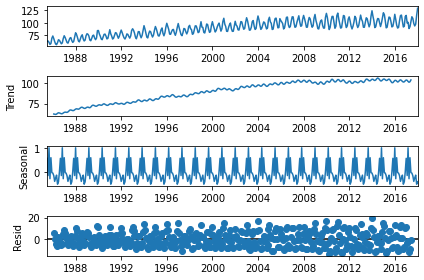

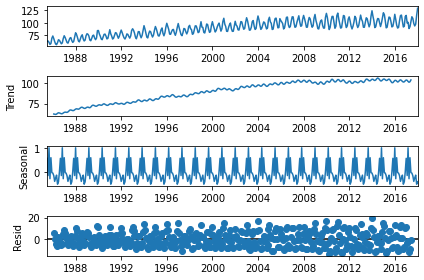

In [52]:
result_add.plot()

In [63]:
res = result_add.resid.to_frame()
res = res[res.resid.notna()]
res.head()

,resid
DATE,
1986-02-01,5.614780
1986-03-01,0.341943
1986-04-01,-4.738467
1986-05-01,-6.449446
1986-06-01,-2.980183


In [93]:
# mean = res.resid.mean()
# std = res.resid.std()
# lower, upper = mean - 2*std, mean + 2*std
# res['abnomaly'] = res['resid'].apply(lambda x: 0 if (lower < x and x < upper) else 1)
[i[1] for i in res[res['abnomaly'] == 1].items()][0].items

<bound method Series.items of DATE
1994-01-01    14.446103
1997-01-01    15.113596
2001-01-01    15.210042
2004-01-01    16.809118
2009-01-01    15.039347
2010-01-01    16.942759
2011-01-01    16.035053
2014-01-01    20.049122
2015-01-01    15.313238
Name: resid, dtype: float64>

In [ ]:
# Multivariate: Isolation Forest/ 聚类模型、孤立森林模型、one-class svm模型

In [ ]:
from sklearn.ensemble import IsolationForest

IsolationForest(*, n_estimators=100, max_samples=’auto’, contamination=’auto’, max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)